<a href="https://colab.research.google.com/github/CHAMS1110/NLP/blob/main/NLP(Sentimental%20analysis%20Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training & testing

1. importing  libraries

In [124]:
#install torchnlp in order to load the dataset
!pip install torchnlp

In [125]:
#used lebraries during the data loading and daa pre-processing
import os
import glob
import torch
import torch.nn as nn
import pandas as pd
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from torchnlp import *

2. Data Collection

In [126]:
# this function download the dataset that we will use it on this application, and devide it into training and testing directory, 
def imdb_dataset(directory='data/',
                 train=False,
                 test=False,
                 train_directory='train',
                 test_directory='test',extracted_name='aclImdb',
                 check_files=['aclImdb/README'],
                 url='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
                 sentiments=['pos', 'neg']):
                 download_file_maybe_extract(url=url, directory=directory, check_files=check_files)
                 x= []
                 splits = [
                 dir_ for (requested, dir_) in [(train, train_directory), (test, test_directory)]
                 if requested
                 ]
                 for split_directory in splits:
                  full_path = os.path.join(directory, extracted_name, split_directory)
                  examples = []
                 for sentiment in sentiments:
                  for filename in glob.iglob(os.path.join(full_path, sentiment, '*.txt')):
                    with open(filename, 'r', encoding="utf-8") as f:
                      textnew = f.readline()
                      examples.append({
                      'text': textnew ,
                      'sentiment': sentiment,})
                      list.append(examples)
                 if len(x) == 1:
                  return x[0]
                 else:
                  return tuple(x)

3. Code Implementation using Keras Library

In [127]:
#used machine learnining libreries
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [128]:
#the maximum words that use on training is 5000
maximum_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=maximum_words)

In [129]:
#the maximum reviews or comment that we use on training is 500
max_review = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review)
X_test = sequence.pad_sequences(X_test, maxlen=max_review)
embedding_vector_length = 32
model = Sequential()
model.add(Embedding( maximum_words, embedding_vector_length, input_length = max_review))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [130]:
model.fit(X_train, y_train, epochs=5, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model accuracy on the IMDb dataset: {0:.2f}%".format(scores[1]*100))

Epoch 1/5
391/391 [==============================] - 277s 700ms/step - loss: 0.4241 - accuracy: 0.7995
Epoch 2/5
391/391 [==============================] - 260s 665ms/step - loss: 0.2837 - accuracy: 0.8875
Epoch 3/5
391/391 [==============================] - 246s 628ms/step - loss: 0.3072 - accuracy: 0.8750
Epoch 4/5
391/391 [==============================] - 218s 557ms/step - loss: 0.2632 - accuracy: 0.8956
Epoch 5/5
391/391 [==============================] - 219s 560ms/step - loss: 0.2141 - accuracy: 0.9177
Model accuracy on the IMDb dataset: 87.48%


In [131]:
print(X_test)
print(len(X_test))

[[   0    0    0 ...   14    6  717]
 [   0    0    0 ...  125    4 3077]
 [  33    6   58 ...    9   57  975]
 ...
 [   0    0    0 ...   21  846    2]
 [   0    0    0 ... 2302    7  470]
 [   0    0    0 ...   34 2005 2643]]
25000


In [132]:
#predict value
final_result = model.predict(X_test)

In [133]:
#set a sentimental function POS <0.5 NEG >0.5
positive = 0 
negative = 0 
neutral  = 0
for i in range(len(final_result)):
  if final_result[i] < 0.555555: 
    positive = positive + 1
  elif final_result[i] > 0.555555:
    negative = negative + 1
  else :
    neutral = neutral + 1
print('positive comment:',positive)
print()
print('negative comment:',negative)
print()
print('neutral comment:',neutral)

positive comment: 12921

negative comment: 12079

neutral comment: 0


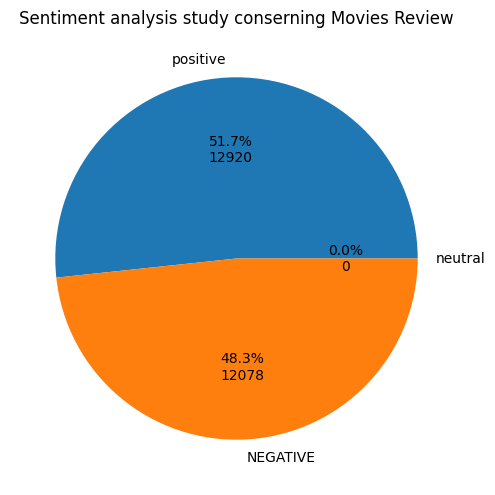

In [134]:
#show the result as graph
from matplotlib import pyplot as plt
import numpy as np
sentiment = ['positive','NEGATIVE','neutral']
data=[positive, negative, neutral]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig = plt.figure(figsize=(6,6), dpi=100)
plt.pie(data, labels= sentiment, autopct = lambda pct: func(pct, data) )
plt.title("Sentiment analysis study conserning Movies Review")
plt.show()

# Tweeter sentiment analysis study

1. install libraries and features

In [135]:
!pip install transformers

2. Download data from Twitter

In [136]:
!pip install snscrape

In [137]:
#important features
import snscrape.modules.twitter as sntwitter
import pandas as pd
import progressbar
from time import sleep
from datetime import datetime
import os
#choose a keyword
movie_dict = {'bitcoin': ['bitcoin since:2022-01-01 until:2022-04-23', 500]}

In [138]:
#build a filter
today = datetime.today().strftime('%Y%m%d')[2:]+'_'
for index, movie_name in enumerate(movie_dict):
    print(movie_name, '%')
    tweets_list1 = []
    bar = progressbar.ProgressBar(maxval=movie_dict[movie_name][1]+2, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{movie_dict[movie_name][0]}').get_items()): 
      #declare a username
        bar.update(i+1)
        if i>movie_dict[movie_name][1]: 
          #number of tweets you want to scrape
            break
        #print(movie_name, i, tweet)
        tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.username]) 
        #declare the attributes to be returned
    tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

    tweets_df1[['Datetime', 'Text']].to_csv(f'{index}.csv')
    bar.finish()

[                                                                        ] N/A%

bitcoin %


[========================================================================] 100%


3. Pre-process the data

In [139]:
#save the comments in csv files
import pandas as pd

#when importing empty rows, they are transformed to nan, so we need to drop them here
df = pd.read_csv('/content/0.csv')[['Text']]
df

,Text
0,"@calgarygrit Bitcoin is a pyramid scheme not ""..."
1,"Hay 19,019,162 #Bitcoin en existencia."
2,Hedge fund manager @BillAckman admitted his mi...
3,@prieff @BitcoinCoderBob Why do you say it's a...
4,@monicataher @nayibbukele @RomeoHerrera1 Mient...
...,...
496,shhot that #Bitcoin to the stars
497,@erickfartman1 @adam22 I’m speaking when it fi...
498,"Bitcoin, stay strong! Fight all the bearish in..."
499,@ericswalwell Bitcoin


In [140]:

#get rid of links and hashtags
df["Text"] = df["Text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))
#get rid of non-ascii characters
df = df.replace(r'\W+', ' ', regex=True)
df

,Text
0,Bitcoin is a pyramid scheme not sound money
1,Hay 19 019 162 Bitcoin en existencia
2,Hedge fund manager admitted his mistake and so...
3,Why do you say it s a premium If I took the sa...
4,Mientras sigan atropellando derechos humanos c...
...,...
496,shhot that Bitcoin to the stars
497,I m speaking when it first came out everyone c...
498,Bitcoin stay strong Fight all the bearish indi...
499,Bitcoin


In [141]:
#convert the csv file on to a list[]
example=df['Text'].values.tolist()
for i in range( len(example)):
  example[i-1]= example[i-1].lower()
print(example)

['bitcoin is a pyramid scheme not sound money ', 'hay 19 019 162 bitcoin en existencia ', 'hedge fund manager admitted his mistake and sold netflix to cut his losses i think paul tudor jones will do the same with bitcoin he was mistaken to think bitcoin would be the fastest horse in the inflation hedge race time to retire bitcoin to the glue factory ', 'why do you say it s a premium if i took the same amount of money i spent on electricity and bought bitcoin with it instead i would have less bitcoin than what i would have mined so it s actually the exact opposite of what you said you re buying it at a discount when you mine', 'mientras sigan atropellando derechos humanos con detenciones ilegales de jóvenes atropellos a periodistas y corrupción seguiremos hundidos en el tercer mundo por más bitcoin y modernización que quieran proyectar elsalvador', ' btc anlaşılan bitcoin o desteğe oturmadan yürümücek 11 2 şi̇ddeti̇nde çalkaliyor ethereum altcoin web3 metaverse', ' hfc btc bitcoin', 'th

In [142]:
#build a word counter
from collections import Counter

all_text2 = ' '.join(example)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)
print(count_words)

Counter({'bitcoin': 480, 'the': 199, 'to': 135, 'a': 132, 'btc': 101, 'is': 98, 'and': 93, 'ma': 84, 'of': 80, 'in': 75, 'i': 73, 'for': 71, 'it': 69, 'crypto': 69, 's': 67, 'you': 61, 'price': 60, 'on': 51, 'this': 49, 'de': 48, 'are': 48, '1': 45, 'that': 45, '0': 42, 'with': 37, '50': 36, 'ethereum': 33, 'last': 33, '20': 33, 'eth': 32, 'me': 32, 'at': 30, 'will': 29, 't': 29, '200': 29, 'be': 28, 'rsi': 28, 'cryptocurrency': 27, 'can': 27, 'not': 24, 'has': 24, 'we': 24, 'as': 23, 'my': 23, 've': 23, '2': 22, 'by': 22, 'no': 22, 'from': 22, 'que': 21, 'or': 21, 'but': 21, 'have': 20, 'here': 20, 'he': 19, '40': 19, 'bir': 19, 'about': 18, 'an': 18, 'all': 18, 'market': 18, 'his': 17, 'live': 17, 'la': 16, 'people': 16, 'just': 16, 'like': 16, 'now': 16, 'saylor': 16, 'money': 15, 'what': 15, 'out': 15, 'lower': 15, 'your': 15, 'indicators': 15, 'b': 15, '43': 15, 'project': 15, 'more': 15, 'en': 14, 'el': 14, 'one': 14, 'blockchain': 14, 'wallet': 14, '39': 14, 'daily': 14, '47968'

In [143]:
#index each word
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print(vocab_to_int)

{'bitcoin': 1, 'the': 2, 'to': 3, 'a': 4, 'btc': 5, 'is': 6, 'and': 7, 'ma': 8, 'of': 9, 'in': 10, 'i': 11, 'for': 12, 'it': 13, 'crypto': 14, 's': 15, 'you': 16, 'price': 17, 'on': 18, 'this': 19, 'de': 20, 'are': 21, '1': 22, 'that': 23, '0': 24, 'with': 25, '50': 26, 'ethereum': 27, 'last': 28, '20': 29, 'eth': 30, 'me': 31, 'at': 32, 'will': 33, 't': 34, '200': 35, 'be': 36, 'rsi': 37, 'cryptocurrency': 38, 'can': 39, 'not': 40, 'has': 41, 'we': 42, 'as': 43, 'my': 44, 've': 45, '2': 46, 'by': 47, 'no': 48, 'from': 49, 'que': 50, 'or': 51, 'but': 52, 'have': 53, 'here': 54, 'he': 55, '40': 56, 'bir': 57, 'about': 58, 'an': 59, 'all': 60, 'market': 61, 'his': 62, 'live': 63, 'la': 64, 'people': 65, 'just': 66, 'like': 67, 'now': 68, 'saylor': 69, 'money': 70, 'what': 71, 'out': 72, 'lower': 73, 'your': 74, 'indicators': 75, 'b': 76, '43': 77, 'project': 78, 'more': 79, 'en': 80, 'el': 81, 'one': 82, 'blockchain': 83, 'wallet': 84, '39': 85, 'daily': 86, '47968': 87, 'bollinger': 88,

In [144]:
#Tokenize the words on each sentence
Tokenize_the_words = []
for sentence in example :
  r = [vocab_to_int[w] for w in sentence.split()]
  Tokenize_the_words.append(r)
print (Tokenize_the_words[0:500])

[[1, 6, 4, 1018, 1019, 40, 556, 70], [1020, 396, 1021, 1022, 1, 80, 1023], [557, 397, 558, 1024, 62, 1025, 7, 1026, 1027, 3, 1028, 62, 1029, 11, 105, 1030, 1031, 559, 33, 116, 2, 301, 25, 1, 55, 106, 1032, 3, 105, 1, 107, 36, 2, 1033, 1034, 10, 2, 560, 557, 1035, 302, 3, 1036, 1, 3, 2, 1037, 1038], [98, 116, 16, 146, 13, 15, 4, 1039, 99, 11, 561, 2, 301, 1040, 9, 70, 11, 562, 18, 1041, 7, 398, 1, 25, 13, 563, 11, 107, 53, 564, 1, 117, 71, 11, 107, 53, 565, 100, 13, 15, 399, 2, 1042, 566, 9, 71, 16, 303, 16, 147, 176, 13, 32, 4, 1043, 158, 16, 400], [1044, 1045, 1046, 1047, 1048, 118, 1049, 1050, 20, 1051, 1052, 4, 1053, 132, 1054, 1055, 1056, 80, 81, 1057, 1058, 304, 210, 1, 132, 1059, 50, 1060, 1061, 1062], [5, 1063, 1, 119, 1064, 1065, 1066, 253, 46, 1067, 1068, 27, 401, 402, 305], [1069, 5, 1], [1070, 16, 303, 306, 403, 34, 53, 2, 567, 568, 71, 15, 120, 16, 147, 307, 3, 36, 404, 58, 1, 159], [1071, 1, 1072, 308, 309, 120, 148, 24, 1073, 309, 569, 570, 24, 1074, 5, 120, 148, 24, 310,

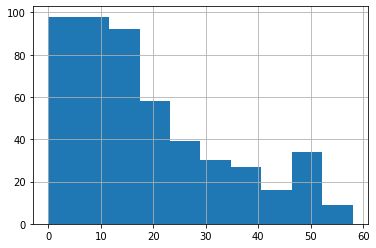

count    501.000000
mean      18.784431
std       14.857639
min        0.000000
25%        7.000000
50%       15.000000
75%       28.000000
max       58.000000
dtype: float64

In [145]:
#Analyze Reviews Length
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

comment_len = [len(x) for x in Tokenize_the_words]
pd.Series(comment_len).hist()
plt.show()
pd.Series(comment_len).describe()

In [146]:
#Padding / Truncating the remaining data
import numpy as np
def pad_features(Tokenize_the_words, seq_length):
    ''' Return features of Tokenize_the_words, where each review is padded with 0's or truncated to the input seq_length.'''
    features = np.zeros((len(Tokenize_the_words), seq_length), dtype = int)
    
    for i, sentence in enumerate(Tokenize_the_words):
        sentence_len = len(sentence)
        
        if sentence_len <= seq_length:
            zeroes = list(np.zeros(seq_length-sentence_len))
            new = zeroes+sentence        
        elif sentence_len > seq_length:
            new = sentence[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [147]:

pad_features(Tokenize_the_words, 500)

array([[   0,    0,    0, ...,   40,  556,   70],
       [   0,    0,    0, ...,    1,   80, 1023],
       [   0,    0,    0, ...,    2, 1037, 1038],
       ...,
       [   0,    0,    0, ...,   75, 3383,    5],
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    4,    1,  522]])

In [148]:
tensor = pad_features(Tokenize_the_words, 500)
final_result = model.predict(tensor)

In [149]:
positive = 0 
negative = 0 
neutral = 0
for i in range(len(final_result)):
  if final_result[i] < 0.55555555: 
    positive = positive + 1
  elif final_result[i] > 0.55555555:
    negative = negative + 1
  else :
    neutral = neutral + 1
print('positive comment:',positive)
print()
print('negative comment:',negative)
print()
print('neutral comment:',neutral)

positive comment: 339

negative comment: 162

neutral comment: 0


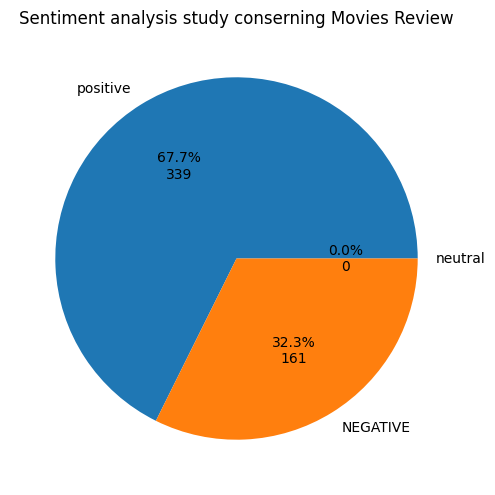

In [150]:
from matplotlib import pyplot as plt
import numpy as np
sentiment = ['positive','NEGATIVE','neutral']
data=[positive, negative, neutral]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig = plt.figure(figsize=(6,6), dpi=100)
plt.pie(data, labels= sentiment, autopct = lambda pct: func(pct, data) )
plt.title("Sentiment analysis study conserning Movies Review")
plt.show()

# Real test

In [95]:
wordst = ['i am happy','Fuck you','i am sad', 'honey'] #1P 3N

In [96]:
from collections import Counter

all_text2 = ' '.join(wordst)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)


In [97]:
total_words = len(words)
sorted_words = count_words.most_common(total_words)
print(count_words)

Counter({'i': 2, 'am': 2, 'happy': 1, 'Fuck': 1, 'you': 1, 'sad': 1, 'honey': 1})


In [98]:

vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print(vocab_to_int)

{'i': 1, 'am': 2, 'happy': 3, 'Fuck': 4, 'you': 5, 'sad': 6, 'honey': 7}


In [99]:
Tokenize_the_words = []
for sentence in wordst :
  r = [vocab_to_int[w] for w in sentence.split()]
  Tokenize_the_words.append(r)
print (Tokenize_the_words[0:4])

[[1, 2, 3], [4, 5], [1, 2, 6], [7]]


In [100]:
import numpy as np
def pad_features(Tokenize_the_words, seq_length):
    ''' Return features of Tokenize_the_words, where each review is padded with 0's or truncated to the input seq_length.'''
    features = np.zeros((len(Tokenize_the_words), seq_length), dtype = int)
    
    for i, sentence in enumerate(Tokenize_the_words):
        sentence_len = len(sentence)
        
        if sentence_len <= seq_length:
            zeroes = list(np.zeros(seq_length-sentence_len))
            new = zeroes+sentence        
        elif sentence_len > seq_length:
            new = sentence[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [101]:
tensor = pad_features(Tokenize_the_words, 4)
final_result = model.predict(tensor)
print(final_result)

[[0.5528872 ]
 [0.58355546]
 [0.56917584]
 [0.50181097]]


In [102]:
positive = 0 
negative = 0 
neutral = 0
for i in range(len(final_result)):
  if final_result[i] < 0.55555555: 
    positive = positive + 1
  elif final_result[i] > 0.55555555:
    negative = negative + 1
  else :
    neutral = neutral + 1
print('positive comment:',positive)
print()
print('negative comment:',negative)
print()
print('neutral comment:',neutral)

positive comment: 2

negative comment: 2

neutral comment: 0


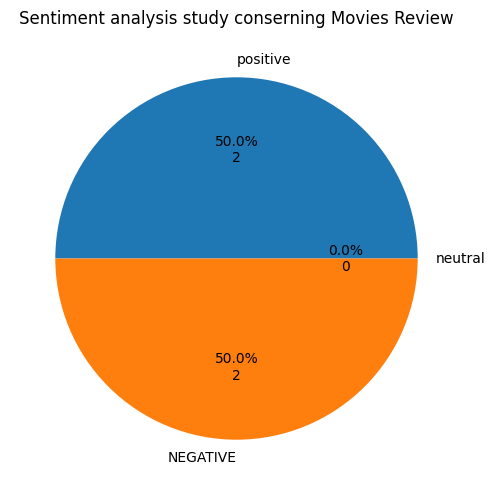

In [103]:
from matplotlib import pyplot as plt
import numpy as np
sentiment = ['positive','NEGATIVE','neutral']
data=[positive, negative, neutral]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig = plt.figure(figsize=(6,6), dpi=100)
plt.pie(data, labels= sentiment, autopct = lambda pct: func(pct, data) )
plt.title("Sentiment analysis study conserning Movies Review")
plt.show()

3. Perform sentiment analysis